In [18]:
import numpy as np
import pylab
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
pylab.rc("figure", figsize=(16, 8))
pylab.rc("font", size=14)

In [2]:
df = pd.read_csv("data/df_stand.csv")
df.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df.head()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.188889,0.747809,0.000875,-2.188080,0.635993,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-1.138008,0.229337
1,-1.188889,0.747809,0.000875,0.651525,-0.412787,0.348870,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.868324
2,-0.182517,0.747809,0.044431,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.023969
3,-0.186274,0.336444,0.029163,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,0.229337
4,-0.404568,-0.897652,0.209333,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,1.073692


In [3]:
X = df['Плотность, кг/м3']
y = df['Соотношение матрица-наполнитель']

In [5]:
x = X

In [45]:
y

0     -1.188889
1     -1.188889
2     -0.182517
3     -0.186274
4     -0.404568
         ...   
994   -0.732919
995    0.558007
996    0.378110
997    0.845687
998    0.958709
Name: Соотношение матрица-наполнитель, Length: 999, dtype: float64

In [6]:
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=0.2)

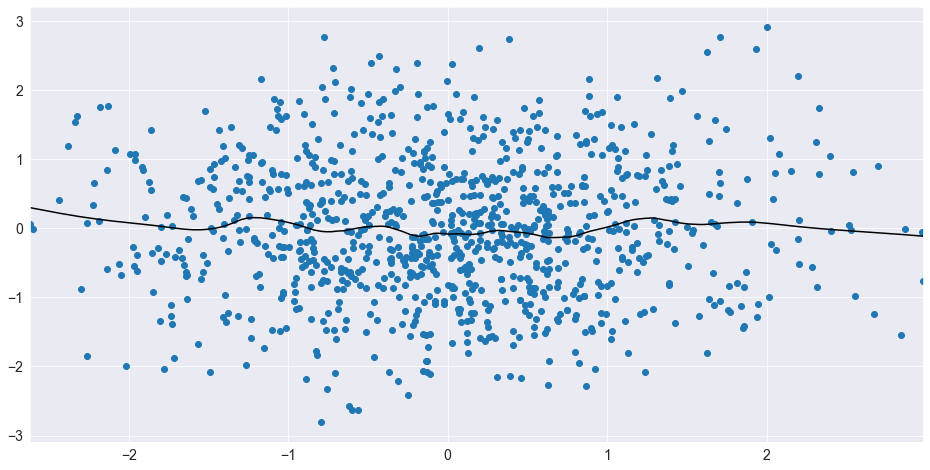

In [7]:
fig, ax = pylab.subplots()

ax.scatter(x, y)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
pylab.autoscale(enable=True, axis="x", tight=True)

https://www.statsmodels.org/stable/examples/notebooks/generated/lowess.html

 # ЛИНЕЙНАЯ

In [42]:
Xs = df['Плотность, кг/м3'].values.reshape(-1,1)

In [43]:
y = df['Соотношение матрица-наполнитель'].values.reshape(-1,1)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg = LinearRegression()

In [48]:
MSEs = cross_val_score(lin_reg, Xs, y, scoring = 'neg_mean_squared_error', cv = 5)

In [49]:
mean_MSE = np.mean(MSEs)

In [50]:
mean_MSE

-1.0027186097436922

# GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [54]:
ridge = Ridge()